# Tutorial 0: Vectors

---
# Setup

Execute the following cells to set up the notebook environment

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Figure settings
import ipywidgets as widgets  # interactive display
from ipywidgets import fixed
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [3]:
# @title Plotting functions
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


def visualize_vectors(v, v_unit):
  """ Plots a 2D vector and the corresponding unit vector

  Args:
    v (ndarray): array of size (2,) with the vector coordinates
    v_unit (ndarray): array of size (2, ) with the unit vector coordinates

  """
  fig, ax = plt.subplots()

  # Set up plot aesthetics
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.set(xlim = [-6, 6], ylim = [-6, 6])
  ax.grid(True, alpha=.4, linewidth=1, zorder=0)

  # Plot vectors
  v_arr = ax.arrow(0, 0, v[0], v[1], width=0.08, color='#648FFF',
                   length_includes_head=True, zorder=2);
  v_unit_arr = ax.arrow(0, 0, v_unit[0], v_unit[1], width=0.08,
                        color='#DC267F',
                        length_includes_head=True, zorder=3);
  ax.set(xlim = [-4, 4], ylim = [-4, 4]);

  # Add legend
  leg = ax.legend([v_arr, v_unit_arr],
                  [r"Vector $\mathbf{v}$",
                   r"Normalized vector $\tilde{\mathbf{v}}$"],
                  handlelength=0, fontsize=20, loc='upper left')
  for handle, label in zip(leg.legendHandles, leg.texts):
    label.set_color(handle.get_facecolor())
    handle.set_visible(False)

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
      FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
      self._verts3d = xs, ys, zs

    def draw(self, renderer):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
      self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
      return FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
      self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

---

# Section 1: Intro to vectors

## Section 1.1: What is a vector?

A vector $\mathbf{x}$ can be considered from at least two perspectives: as an ordered list of numbers or as an arrow with the base at the origin of a coordinate system. These are two ways of looking at a single thing: in the arrow case, the tip of the arrow is defined by a coordinate (which can be represented by the ordered list).
<br/><br/>

The **dimensionality of a vector** is determined by the number of components in the ordered list (or the dimensionality of the space in which the arrow exists). For example, $\mathbf{x} = \begin{bmatrix} 4 \\ 2 \\ 1  \end{bmatrix}$ is a 3 dimensional vector. We can refer to components by $\mathbf{x}_i$ where i indicates the position of the component. In this vector, $\mathbf{x_1} = 4$, $\mathbf{x_2} = 2$, and $\mathbf{x_3} = 1$.

<br/><br/>
One defining property of a vector is its length: $||\mathbf{x}||$. This is the length of the arrow and can be computed as the square root of the sum of all components squared:

\begin{equation}
||\mathbf{x}|| = \sqrt{\sum_{i=1}^N \mathbf{x}_i^2}
\end{equation}

<br/><br/>
We have two special types of vectors with specific names. **Zero vectors** have length 0 (and all components equal 0). **Unit vectors** have length 1. You can normalize a vector and create a unit vector, $\tilde{\mathbf{x}}$, by dividing by its length,$||\mathbf{x}||$ :

\begin{equation}
\tilde{\mathbf{x}} = \frac{\mathbf{x}}{||\mathbf{x}||}
\end{equation}

### Coding Exercise 1.1: Normalizing vectors

In this exercise, you will first create the below vector, $\mathbf{v}$, using a numpy array. You will then implement a function, `normalize_vector`, that outputs a normalized version of the input vector (by dividing each component by the vector length).  You will then visualize both the original vector and the unit vector.

First think: how do you think the normalized unit vector will compare to the original vector in terms of direction and length?


\begin{equation}
\mathbf{v} =
\begin{bmatrix}
4 \\
1
\end{bmatrix}
\end{equation}

In [4]:
def normalize_vector(input_vector):
  """ Normalizes a vector to length 1

  Inputs:
    input_vector (ndarray): array of shape (n_dim, ) where n_dim is the
        dimensionality of the vector

  Outputs:
    (ndarray): normalized vector of length 1
  """
  # raise NotImplementedError("Student exercise: complete normalize_vector function")


  # Compute vector length (use np.linalg.norm)
  vector_length = np.linalg.norm(input_vector) #  YOUR CODE HERE

  # Create normalized vector
  normalized_vector = input_vector/vector_length# YOUR CODE HERE

  return normalized_vector

<ipython-input-3-25232a2bc73d>:37: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, label in zip(leg.legendHandles, leg.texts):


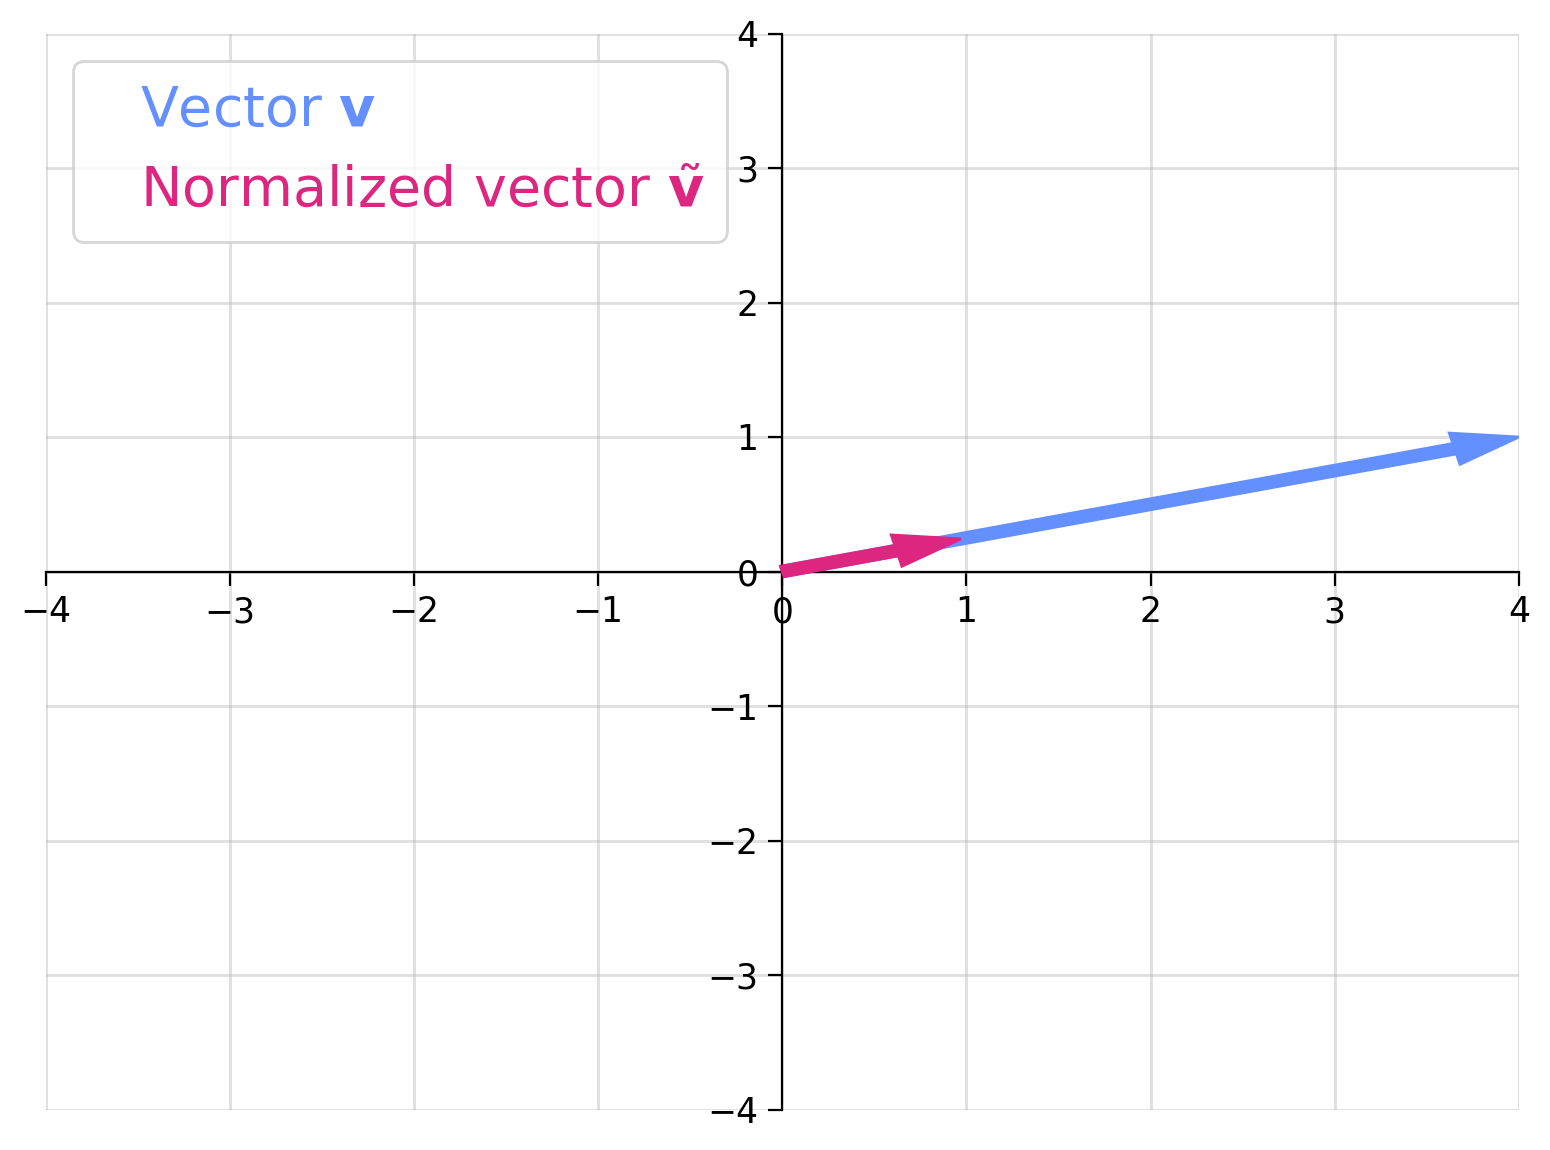

In [5]:
# Create vector v from above (use np.array)
v = np.array([4,1])# YOUR CODE HERE

# Call the function
v_unit = normalize_vector(v)

# Visualize the vectors
visualize_vectors(v, v_unit)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=575.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/precourse/main/tutorials/W0D3_LinearAlgebra/static/W0D3_Tutorial1_Solution_121dde78_352.png>





Note that the unit vector still points in the same direction as the original (it overlays it). Dividing each component by a constant (the length) does not change the direction. The only change is the length - the normalized vector has a length of 1.

## Section 1.2: Vector operations



We have several mathematical operations we perform on or with vectors. **Scalar multiplication** of a vector changes its length but not its direction (except for sometimes reversing by 180 degrees as we'll see in the next demo). When we multiply a vector, $\mathbf{x}$,  by a scalar, $a$, we multiply each individual component by the scalar:

$$ a\mathbf{x} = \begin{bmatrix}
    a\mathbf{x}_1 \\ a\mathbf{x}_2 \\ \vdots \\ a\mathbf{x}_N
\end{bmatrix}$$

You can visualize **vector addition** as the stacking of the two arrows head to tail. In essence, you are moving the second vector so its base is at the tip of the first, without changing its direction. The tip of this stacked second vector is the new added vector's tip. In order words, if you visualize two vectors as sides of a parallelogram, adding them will create a vector with the 4th vertex of that parallelogram as its tip. Numerically, this means that we add the corresponding components of each vector:


 $$\mathbf{x} + \mathbf{y} = \begin{bmatrix}
           \mathbf{x}_{1} + \mathbf{y}_1 \\ \mathbf{x}_{2} + \mathbf{y}_2\\ \vdots \\ \mathbf{x}_{N} + \mathbf{y}_N
\end{bmatrix}$$


We call a group of 2 or more vectors a **set of vectors**. A **linear combination** of a set of vectors is a combination of the set using scalar multiplication and vector addition. Essentially, we are multiplying each vector in the set by a scalar and then adding all the scalar multiplied vectors together: the output of this (another vector) is a linear combination of the set. More formally defined, a vector, $\mathbf{u}$, is a linear combination of a set of vectors $\mathbf{v}^1, \mathbf{v}^2, ..., \mathbf{v}^N$ with (scalar) weights $c_1, c_2, ...c_N$ if:

$$\mathbf{u} = c_1\mathbf{v}^1 + c_2\mathbf{v}^2 + ... + c_n\mathbf{v}^N $$.
</details>


### Interactive Demo: Linear combination of vectors
In the following demo, we will demonstrate a linear combination of two vectors, $\mathbf{x}$ and $\mathbf{y}$.

\begin{equation}
\mathbf{z} = a\mathbf{x} + b\mathbf{y}
\end{equation}

where $\mathbf{x} = \begin{bmatrix}3 \\ 1 \end{bmatrix}$ and $\mathbf{y} = \begin{bmatrix}-1 \\ 2 \end{bmatrix}$.

You will play with the scalar multiples $a$ and $b$ to visualize both scalar multiplication and vector addition. Think and talk through the following questions:

1. How does $a\mathbf{x}$ compare to $\mathbf{x}$ when $a$ is negative?
2. How does $a\mathbf{x}$ compare to $\mathbf{x}$ when $a$ is a fraction?
3. Can you get $\mathbf{z}$ to point to anywhere in the 2D space with combinations of $a$ and $b$?
4. Would this be the case no matter what $\mathbf{x}$ and $\mathbf{y}$ are, as long as they are both 2D vectors?

In [ ]:
 #@markdown Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.


def plot_arrows(x, y, a_times_x, b_times_y):
  fig, ax = plt.subplots(figsize=(10, 7))

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  ax.set_aspect('equal', adjustable='box')
  ax.set(xlim = [-10, 10], ylim = [-10, 10], xticks = np.arange(-10, 10), yticks = np.arange(-10, 10), xticklabels = [], yticklabels = [])

  ax.grid(alpha=.4)

  z = a_times_x + b_times_y
  z_arr = ax.arrow(0, 0, z[0], z[1], width=.08, color='k', length_includes_head = True);

  x_orig, = ax.plot([0, x[0]], [0, x[1]], '--', color='#648FFF')
  y_orig, = ax.plot([0, y[0]], [0, y[1]], '--',  color='#DC267F')

  ax_arr = ax.arrow(0, 0, a_times_x[0], a_times_x[1], width=.08, color='#648FFF', length_includes_head = True);
  by_arr = ax.arrow(0, 0, b_times_y[0], b_times_y[1], width=.08, color='#DC267F', length_includes_head = True);

  ax.plot([a_times_x[0], z[0]], [a_times_x[1], z[1]], '--k')
  ax.plot([b_times_y[0], z[0]], [b_times_y[1], z[1]], '--k')


  leg = ax.legend([x_orig, y_orig, ax_arr, by_arr, z_arr], [r"$\mathbf{x}$", r"$\mathbf{y}$", r"$a\mathbf{x}$", r"$b\mathbf{y}$", r"$\mathbf{z} = a\mathbf{x} + b\mathbf{y}$"], handlelength = 2, fontsize = 25, loc = 'center left', bbox_to_anchor=(1.05, .5))
  for handle, label in zip(leg.legendHandles, leg.texts):
      try:
          label.set_color(handle.get_facecolor())
      except:
          label.set_color(handle.get_color())
      #handle.set_visible(False)

@widgets.interact(a = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1), b = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1))
def plot_linear_combination(a, b):
  x = np.array([3, 1])
  y = np.array([-1, 2])

  plot_arrows(x, y, a*x, b*y)